# Deeplearning 특강



바로 실습으로 넘어가자!

Tensorflow & Keras의 기초에 대해 알아보자.

# Tensorflow

In [1]:
import tensorflow as tf

In [4]:
a = tf.constant(3.0)
b = tf.constant(4.0)
c = tf.constant(5.0)
d=a*b+c
print(d)

Tensor("add_2:0", shape=(), dtype=float32)


In [5]:
# 노드와 엣지를 이용한 그래프를 그려 Session을 이용하여 출력하는 것.
# 그래야 값이 출력됨.
sess = tf.Session()
sess.run(d)

17.0

## Linear Regression

In [24]:
# 입력 및 모델 정의 
W = tf.Variable(tf.random_normal(shape=[1],name='W'))
b = tf.Variable(tf.random_normal(shape=[1],name='b'))
X = tf.placeholder(tf.float32)

pred = W*X+b

In [25]:
y = tf.placeholder(tf.float32)

# MSE 이용
loss = tf.reduce_mean(tf.square(pred - y))

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [27]:
# 목표 모델  y=2x+1
X_train = [1,2,3,4]
y_train = [3,5,7,9]

In [28]:
# W, b 파라미터 초기화 
sess = tf.Session()
result = sess.run(tf.global_variables_initializer())

In [29]:
# 학습
for i in range(1000):
    sess.run(train,feed_dict={X:X_train,y:y_train})

In [30]:
# 테스트
X_test = [3,5,5,6]
print(sess.run(pred,feed_dict={X:X_test}))

[ 6.999756 10.991601 10.991601 12.987524]


# Keras

In [32]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## EX 1 ) MNIST

In [33]:
# Keras version MNIST
# MNIST datasets 준비하기
from keras.datasets import mnist
# train:test = 60,000 : 10,000
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [35]:
print(train_images.shape, train_labels)

(60000, 28, 28) [5 0 4 ... 5 6 8]


5


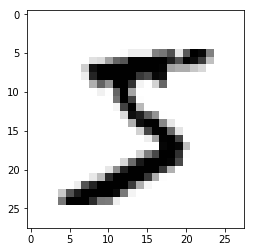

In [42]:
# 데이터 하나 출력해보기
print(train_labels[0])
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

In [43]:
from keras import models
from keras import layers

# 레고 쌓듯이 쌓으면 됨
network = models.Sequential()
# Dense  = FullyConnectedLayer
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [44]:
# network training
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255  # 픽셀값을 0~1 사이로 만들어줌 ( 정규화 과정 )  # 흑백픽셀은 0~255 값을 가짐 

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255   # 당연히 테스트 이미지도 정규화 해야함

In [46]:
# 레이블을 범주형으로 인코딩
# One-hot encoding을 하는 것과 유사.
# 해당하는 곳은 1, 나머지는 0으로 표현 
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [50]:
# 훈련
# 총 5바퀴 도는 것 
# 한 번에 128개씩(28 28 이미지를) 넣어서 진행하는 것  ( = 임의의 숫자 )
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.2583 - acc: 0.9252
Epoch 2/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.1045 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0701 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0503 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0379 - acc: 0.9886


In [53]:
# Model evaluate
test_loss, test_acc = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 40us/step


In [58]:
print("test_loss :" ,test_loss,"test_acc:" ,test_acc)

# Weight를 다르게 랜덤하게 시작하기 때문에 할 때마다 정확도가 다를 수 있다. 
# 반복 수를 늘리면 똑같은 값에 수렴할 수 있다. 

test_loss : 0.06686073924119118 test_acc: 0.9804


## EX 2 ) Classifying movie reviews

In [137]:
# 50,000개의 양극단 리뷰로 구성 ( Positive / Negative )
from keras.datasets import imdb

(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [138]:
# 리뷰 단어의 index로 매핑이 되어있는 것. 
# 훈련을 위해 숫자로 매핑이 되어있는 것 ( 1 ~ 10,000 )
# 10개 단어만 보자
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [139]:
# 1 = 긍정 / 0 = 부정
train_labels[0]

1

In [140]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집음
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
# 리뷰를 디코딩
# 0,1,2는 패딩, 문서시작, 사전에 없음을 위한 인덱스이므로 3을 뺀다. 
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [141]:
# ?는 10,000 밖의 단어이다.
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [142]:
import numpy as np
# 10000으로 설정한 것은 sparcity의 문제. 
# 강의실에서 사람 한 명을 찾는 것, 더 넓은 도시에서 사람 한 명을 찾는 것. 학습의 속도, 정보량의 차이 ( 10000은 사용자 설정 )
# 얼마나 희소하게 만들 것인가. 수 가 줄 수록 단어를 decoding 할 수 있는게 줄어드는 것 

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))     # 크기를 맞춰 0으로 채워진 행렬 구성
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.      # result[i]에서 특정 index위치를 1로 만듬  / one-hot하는 거임 
    return results

# 학습을 하기 위해
# 훈련 데이터 벡터로 변환
X_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
X_test = vectorize_sequences(test_data)

In [143]:
# 레이블 벡터로 바꾸기
# array로 만들되 type을 float32로 하는 것. 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [173]:
# 신경망 구성 
from keras import models
from keras import Sequential
from keras.layers import Dropout

# input 다음층부터 차근차근 쌓아올리는 것 
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))  # 뒤는 정해져있지 않다. (콤마 뒤에, 몇 개가 들어갈지 모르는 것 )
model.add(layers.Dense(32,activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
# sigmoid라 결과가 확률로 나옴

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [174]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# 다 똑같음
from keras import optimizers

optimizer = model.compile(optimizers.RMSprop(lr=0.001) ,loss='binary_crossentropy',metrics=['accuracy'])

# 다 똑같음
from keras import losses
from keras import metrics

optimizer = model.compile(optimizers.RMSprop(lr=0.001) ,loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])


In [175]:
# 훈련 검증
# Validation Set 만들기
X_val = X_train[:5000]
partial_x_train = X_train[5000:]

y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [176]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(X_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 226us/step - loss: 0.4787 - acc: 0.7784 - val_loss: 0.3293 - val_acc: 0.8766
Epoch 2/20
20000/20000 [==============================] - 2s 94us/step - loss: 0.2684 - acc: 0.9004 - val_loss: 0.2820 - val_acc: 0.8900
Epoch 3/20
20000/20000 [==============================] - 2s 100us/step - loss: 0.2109 - acc: 0.9220 - val_loss: 0.2792 - val_acc: 0.8922
Epoch 4/20
20000/20000 [==============================] - 2s 98us/step - loss: 0.1658 - acc: 0.9428 - val_loss: 0.2980 - val_acc: 0.8864
Epoch 5/20
20000/20000 [==============================] - 2s 98us/step - loss: 0.1241 - acc: 0.9568 - val_loss: 0.3317 - val_acc: 0.8852
Epoch 6/20
20000/20000 [==============================] - 2s 93us/step - loss: 0.1013 - acc: 0.9654 - val_loss: 0.3564 - val_acc: 0.8846
Epoch 7/20
20000/20000 [==============================] - 2s 93us/step - loss: 0.0782 - acc: 0.9745 - val_loss: 0.4657 - val_ac

In [177]:
# 케라스는 history가 남아있음 
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [178]:
import matplotlib.pyplot as plt

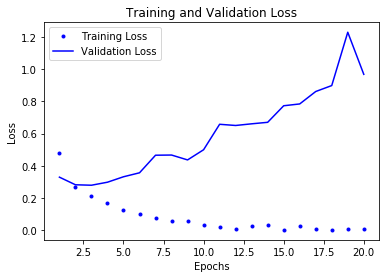

In [179]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 파란점
plt.plot(epochs, loss, 'b.',label='Training Loss')
# 파란선
plt.plot(epochs,val_loss,'b',label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [180]:
# 예측하기
# 확률 값으로 나오게 됨 
model.predict(X_test)

array([[7.8040361e-04],
       [1.0000000e+00],
       [9.8393118e-01],
       ...,
       [1.6168952e-03],
       [1.5429854e-03],
       [9.9995941e-01]], dtype=float32)

Training Lossd와 Validation Loss의 Gap이 벌어지는 모습을 통해 Overfitting 된 모습을 알 수 있다. 
모델, 데이터를 수정해서 새로 학습해야한다. 

dropout을 해도 큰 차이가 없다.... 다른 방법으로 Overfitting을 해결해야 할 것 같다. 